In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('delivery_time (1).csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Display information about the 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

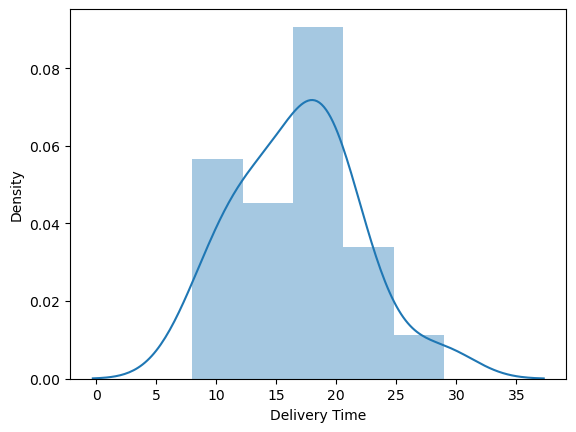

In [5]:
# Create a distribution plot for the 'Delivery Time'
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

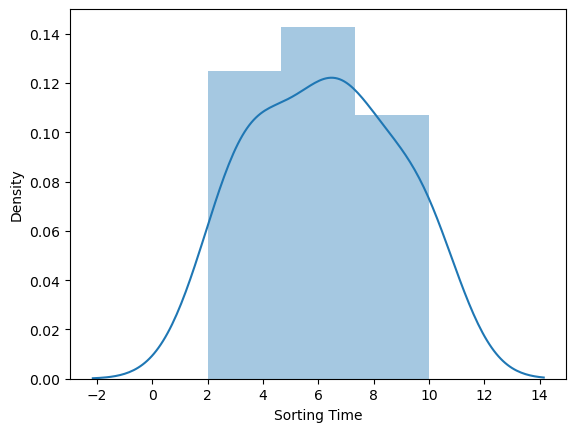

In [6]:
# Create a distribution plot for the 'Sorting Time'
sns.distplot(data['Sorting Time'])

In [7]:
# Rename the data
dataset=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
# Calculate the correlation matrix for the dataset
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

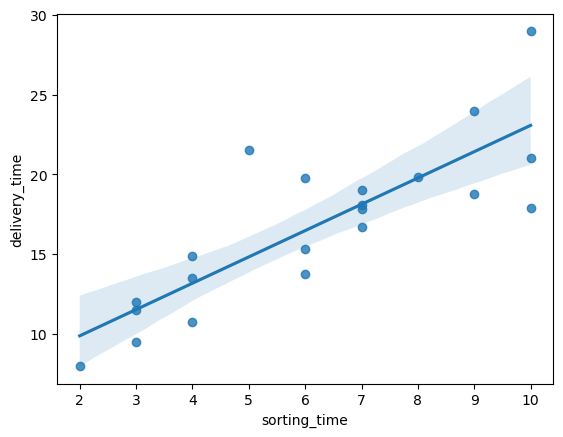

In [9]:
# This code creates a regression plot using Seaborn library
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Model Building

In [10]:
import statsmodels.formula.api as smf

In [11]:
# Fit an Ordinary Least Squares (OLS) model using statsmodels formula API
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [12]:
model.params    # Retrieve the parameters of a statistical model

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
model.tvalues     # Display the t-values of a statistical model

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [14]:
model.pvalues     # Display the p-values of a statistical model

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [15]:
model.rsquared    # Retrieve the R-squared from the 'model'

0.6822714748417231

In [16]:
 model.rsquared_adj   # Access the adjusted R-squared value from the statistical model

0.6655489208860244

# Model Predictions

In [17]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [18]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [19]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [20]:
# Predict using the 'predict' method 
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64